In [12]:
import pandas as pd
from sklearn.cluster import DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt
from lez2_2 import *

In [4]:
data = load_data(path = "../data/Wholesale customers data.csv")

In [5]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [6]:
data_scaled = scale_data(data)

In [7]:
def make_dbscan(data_scaled):
    dbscan = DBSCAN(eps=0.2, min_samples=5)
    dbscan_labels = dbscan.fit_predict(data_scaled)
    return dbscan_labels

In [9]:
dbscan_labels = make_dbscan(data_scaled)

In [11]:
unique_labels = set(dbscan_labels)
palette = sns.color_palette("Set2", len(unique_labels))
color_map = {
    label: palette[i] if label != -1 else (0.6, 0.6, 0.6)  # grigio per outlier
    for i, label in enumerate(sorted(unique_labels))
}
colors_dbscan = [color_map[label] for label in dbscan_labels]

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_title'

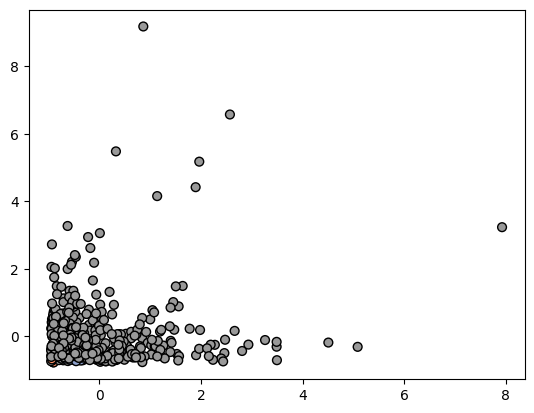

In [14]:
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=colors_dbscan, s=40, edgecolor='black')
plt.set_title("DBSCAN: forma naturale + outlier (grigio)")
plt.set_xlabel("Feature 1")
plt.set_ylabel("Feature 2")
plt.grid(True)

plt.tight_layout()
plt.show()
